1400855
602120
323691
1551441


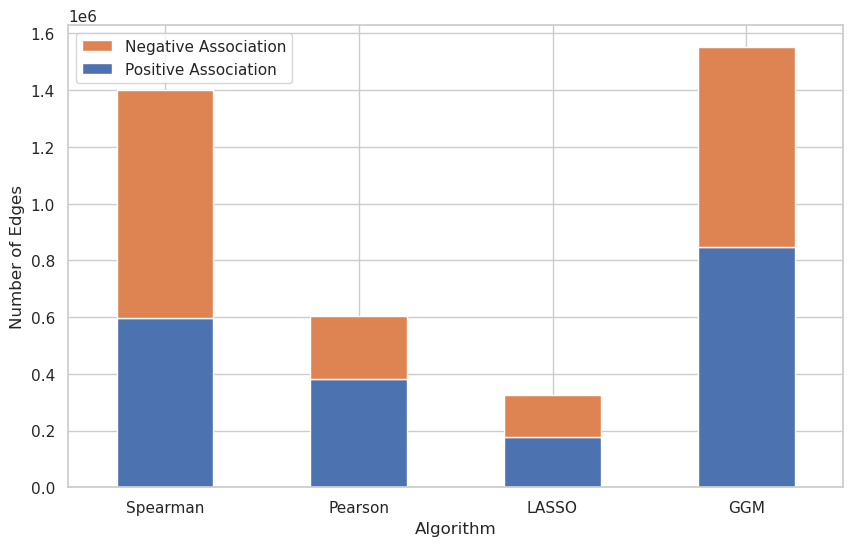

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_name = "necromass_bacteria_fungi"
dataset_name = "necromass_bacteria"
dataset_name = "necromass_fungi"

algorithm_dict = {
    "Spearman": f"{dataset_name}_Spearman_source_target.csv",
    "Pearson": f"{dataset_name}_Pearson_source_target.csv",
    "LASSO": f"{dataset_name}_LASSO_source_target.csv",
    "GGM": f"{dataset_name}_GGM_source_target.csv"
}

algo_edges_df_list = []
for algorithm, source_target_file in algorithm_dict.items():
    local_df = pd.read_csv(source_target_file)
    # create a new row as a dictionary
    new_row = {
        "Positive Association": local_df["weight"].value_counts().loc[lambda x: x.index > 0].sum(),
        "Negative Association": local_df["weight"].value_counts().loc[lambda x: x.index < 0].sum(),
        "Algorithm": algorithm}
    # use pandas.concat() to append the new row to an empty dataframe
    new_df = pd.concat([pd.DataFrame(), pd.DataFrame(new_row, index=[0])])
    # new_df["Number of Edges"] = local_df["weight"].count()
    print(local_df["weight"].count())
    algo_edges_df_list.append(new_df)

algo_edges_df = pd.concat(algo_edges_df_list)

# plot the stacked bar plot using matplotlib
sns.set(style="whitegrid")
ax = algo_edges_df.set_index('Algorithm').plot.bar(
    stacked=True, figsize=(10, 6))

# set the labels and title
plt.xlabel("Algorithm")
plt.ylabel("Number of Edges")
plt.title("Number of Edges by Algorithm and Association")
# plt.title("Number of Edges by Algorithm and Association")

# draw a horizontal line at y=8000
# ax.axhline(y=8128, color='red', linestyle='--')

# add a text annotation
# ax.text(x=0.5, y=8500, s='Maximum number of edges = 8128', color='red')

# make the x-axis labels horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

# save the plot
plt.savefig(f'{dataset_name}_edges_algo.png', bbox_inches='tight', dpi=1500)

# show the plot
plt.show()


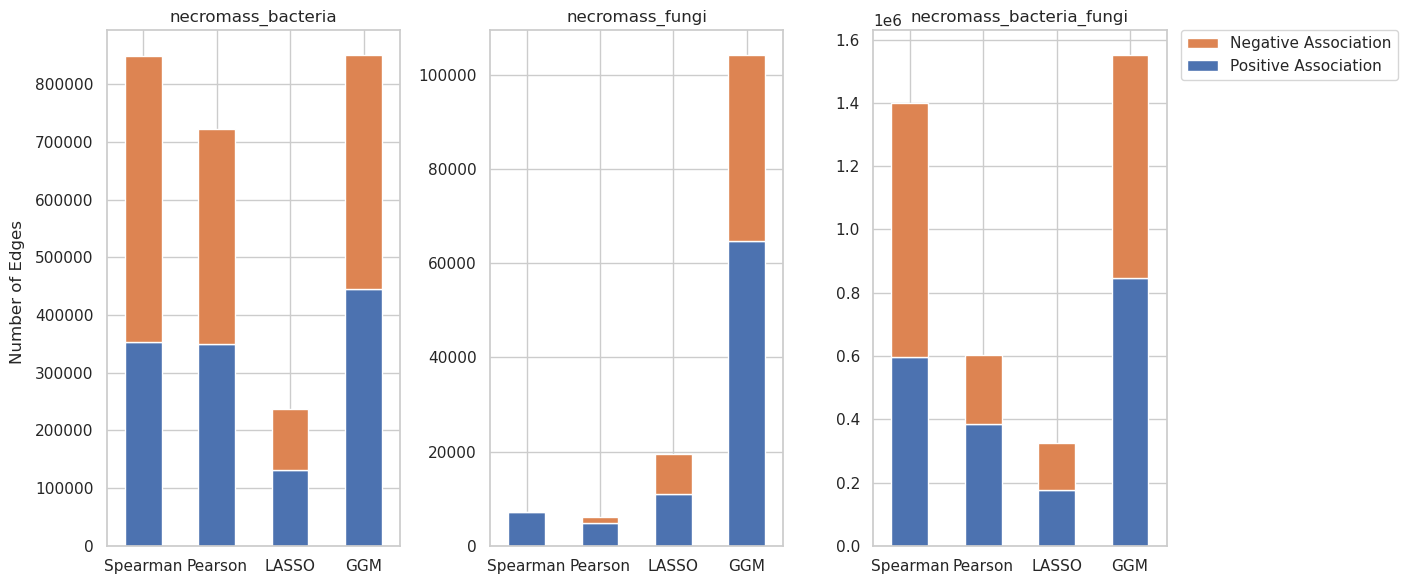

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_names = ["necromass_bacteria", "necromass_fungi", "necromass_bacteria_fungi"]

fig, axes = plt.subplots(1, 3, figsize=(28, 15))  # Create 3 subplots in a single row

for i, dataset_name in enumerate(dataset_names):
    algorithm_dict = {
        "Spearman": f"{dataset_name}_Spearman_source_target.csv",
        "Pearson": f"{dataset_name}_Pearson_source_target.csv",
        "LASSO": f"{dataset_name}_LASSO_source_target.csv",
        "GGM": f"{dataset_name}_GGM_source_target.csv"
    }

    algo_edges_df_list = []
    for algorithm, source_target_file in algorithm_dict.items():
        local_df = pd.read_csv(source_target_file)
        new_row = {
            "Positive Association": local_df["weight"].value_counts().loc[lambda x: x.index > 0].sum(),
            "Negative Association": local_df["weight"].value_counts().loc[lambda x: x.index < 0].sum(),
            "Algorithm": algorithm}
        new_df = pd.concat([pd.DataFrame(), pd.DataFrame(new_row, index=[0])])
        algo_edges_df_list.append(new_df)

    algo_edges_df = pd.concat(algo_edges_df_list)

    # Plot the stacked bar plot on the current subplot
    sns.set(style="whitegrid")
    ax = algo_edges_df.set_index('Algorithm').plot.bar(
        stacked=True, figsize=(14, 6), ax=axes[i])

    # Set the labels and title for the current subplot
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(f"{dataset_name}")

    # Make the x-axis labels horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    ax.legend().remove()

    # Get handles and labels
    # Update the legend for the final subplot
    
        
    # order = [1, 0]
    # ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])


# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
# show the legend outside the plot
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0.)

# Set the title for the entire plot
# fig.suptitle("Number of Edges against Algorithm for Necromass Species", fontsize=16)

# set y-axis label for the entire plot
fig.text(-0.005, 0.5, "Number of Edges", va='center', rotation='vertical')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot
plt.savefig('necromass_species_edges_algo.png', bbox_inches='tight', dpi=1500)

# Show the plot
plt.show()
